# FER analysis - AD vs Chega
- Location of face: bounding box [x1, x2, y1, y2]
- Embedding vector of face with 128 elements
- Emotion: string
- Logits (probability/accuracy of that same emotion)


In [56]:
# Importing the libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
from PIL import Image
from collections import Counter


# Importing the data about a specific video in the folder "pkl_files"
data = pd.read_pickle("pkl_files/ad-chega.pkl")

"""
# Display the first few rows of the DataFrame to understand its structure
print("\n\n\n***********DATA HEAD*************")
print(data.head())

# Check how many rows and columns are there in the DataFrame
print("\n\n\n***********DATA SHAPE*************")
print(data.shape)

# Get a concise summary of the DataFrame
print("\n\n\n***********DATA INFO*************")
print(data.info())

# Summary statistics for numeric columns
print("\n\n\n***********DATA DESCRIBE*************")
print(data.describe()) """





'\n# Display the first few rows of the DataFrame to understand its structure\nprint("\n\n\n***********DATA HEAD*************")\nprint(data.head())\n\n# Check how many rows and columns are there in the DataFrame\nprint("\n\n\n***********DATA SHAPE*************")\nprint(data.shape)\n\n# Get a concise summary of the DataFrame\nprint("\n\n\n***********DATA INFO*************")\nprint(data.info())\n\n# Summary statistics for numeric columns\nprint("\n\n\n***********DATA DESCRIBE*************")\nprint(data.describe()) '

## Information about FER (face emotion recognition )

1. Each frame detects up to n faces, where n is the actual number of present faces

2. Each 'face' element has:
    - Location of face: bounding box [x1, x2, y1, y2]
    - Embedding vector of face with 128 elements
    - Emotion: string
    - Logits (probability/accuracy of that same emotion)

3. Ploted metrics throughout this document (note: always ignoring sign language lady when reasonable)
    - Emotion count 
    - Normalized emotion count 
    - Count of number of faces per frame
    - Normalized count of number of faces per frame
    - Number of faces per frame vs time
    - Heatmap of found faces bounding boxes
    - Most common expressions in pairs
    - Most common expressions by person
    


In [24]:
# Get information about faces in a random frame
frame_id = data.iloc[0]['filename']
print("\n\n\n***********FRAME ID*************")
print(frame_id)

# Print the frame
#frame = Image.open(frame_id)
#plt.imshow(frame)
#plt.show()

# Get information about fer in that same frame
print("\n\n\n***********FER*************")
fer = data.iloc[0]['fer']
print(fer)







***********FRAME ID*************
img00116.jpeg



***********FER*************
[{'location': [773, 1055, 129, 412], 'embedding': [-0.04654862359166145, -0.055703867226839066, 0.030526189133524895, -0.1566607505083084, -0.0700339749455452, 0.07200043648481369, -0.11560878902673721, -0.0026026710402220488, -0.007850423455238342, 0.024855848401784897, 0.008624738082289696, -0.0638255774974823, -0.03454547002911568, 0.025359608232975006, 0.08842050284147263, -0.0009314243216067553, 0.04955682530999184, -0.027614520862698555, -0.02903548628091812, 0.026324491947889328, 0.1326320767402649, 0.048952311277389526, 0.03662055358290672, -0.22078949213027954, 0.11258871108293533, -0.07468543201684952, -0.2855584919452667, -0.1660623997449875, -0.028834009543061256, 0.05949556827545166, 0.2061419039964676, -0.028864016756415367, 0.17874041199684143, -0.0791635662317276, -0.0001875050220405683, -0.04046662896871567, -0.09946189820766449, 0.09888261556625366, -0.06955771148204803, 0.003551505040377

In [25]:
# Order the frames by name
data = data.sort_values(by='filename')





***********EMOTIONS COUNT*************


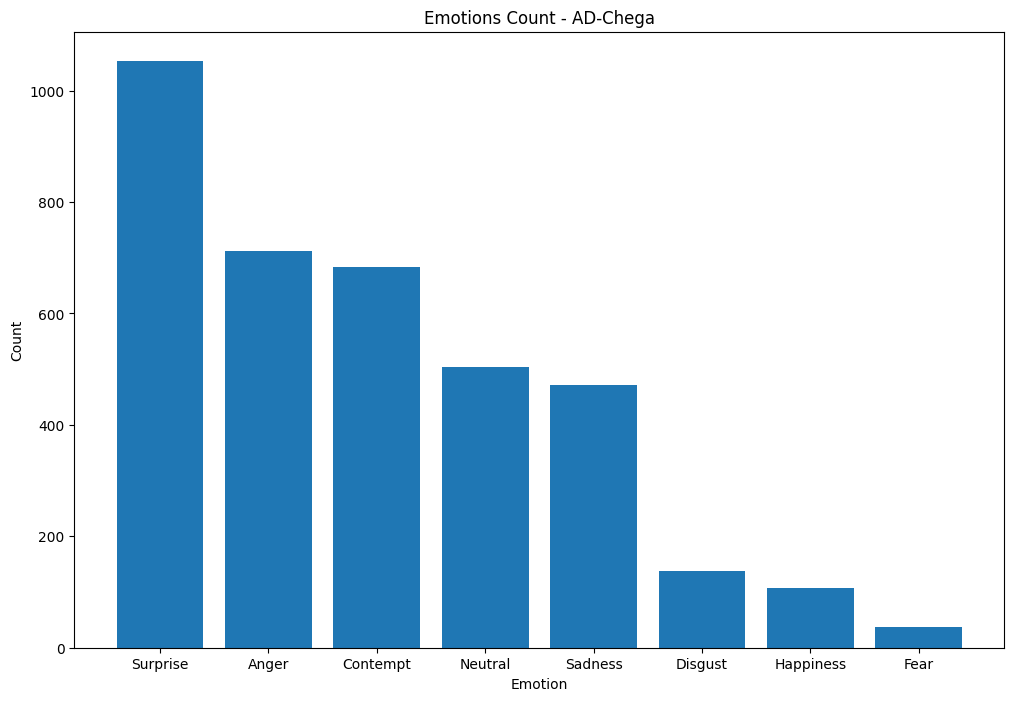

In [26]:
# Count the number of emotions in the DataFrame and plot as a bar chart
print("\n\n\n***********EMOTIONS COUNT*************")
emotions = []

# Loop through the DataFrame and extract the emotions (without sign language lady)
for i in range(data.shape[0]):
    for fer in data.iloc[i]['fer']:
        if fer['location'][0] < 1000 and fer['location'][2] < 500:
            emotions.extend([fer['emotion']])

# Count the number of each emotion
emotion_count = Counter(emotions)

# Order the emotions by their counts
emotion_count = {k: v for k, v in sorted(emotion_count.items(), key=lambda item: item[1], reverse=True)}

# Plot the emotions count
plt.figure(figsize=(12, 8))
plt.bar(emotion_count.keys(), emotion_count.values())
plt.title("Emotions Count - AD-Chega")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()







***********EMOTIONS COUNT NORMALIZED*************
{'Surprise': 0.28405718910169947, 'Anger': 0.19206905853790127, 'Contempt': 0.18451578095495008, 'Neutral': 0.13595899649312113, 'Sadness': 0.12732667925546265, 'Disgust': 0.036957108173725384, 'Happiness': 0.029134070677097383, 'Fear': 0.009981116806042621}


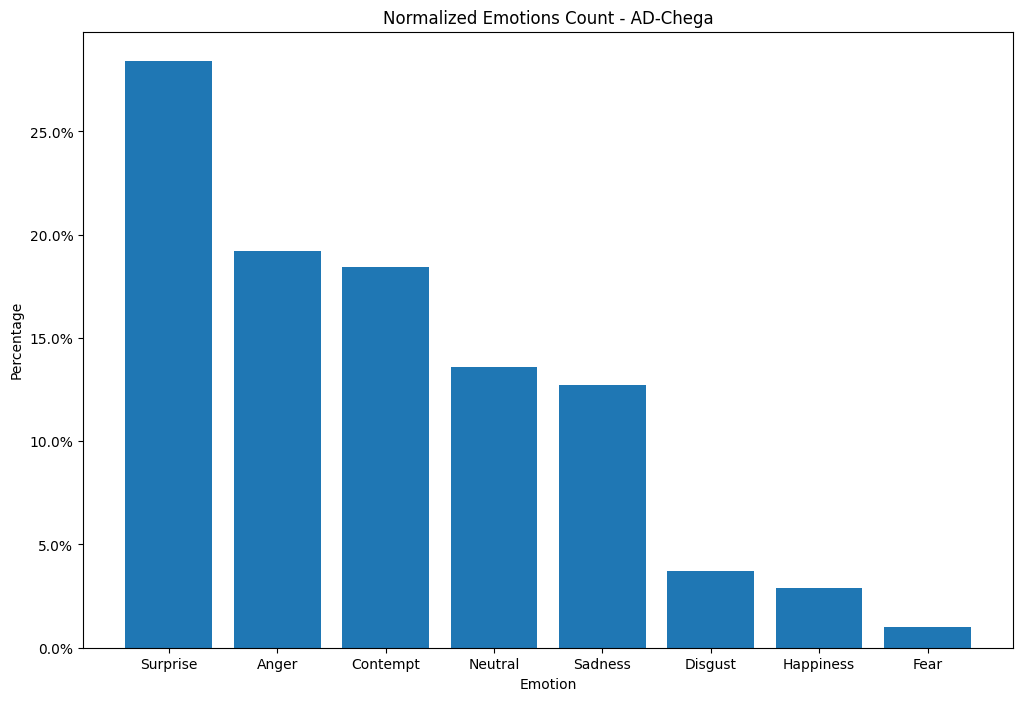

In [27]:

# Normalize the emotions count
total = sum(emotion_count.values())
emotion_count_normalized = {k: v/total for k, v in emotion_count.items()}
print("\n\n\n***********EMOTIONS COUNT NORMALIZED*************")
print(emotion_count_normalized)

# Plot the normalized emotions count
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(emotion_count_normalized.keys(), emotion_count_normalized.values())
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Normalized Emotions Count - AD-Chega")
plt.xlabel("Emotion")
plt.ylabel("Percentage")
plt.show()


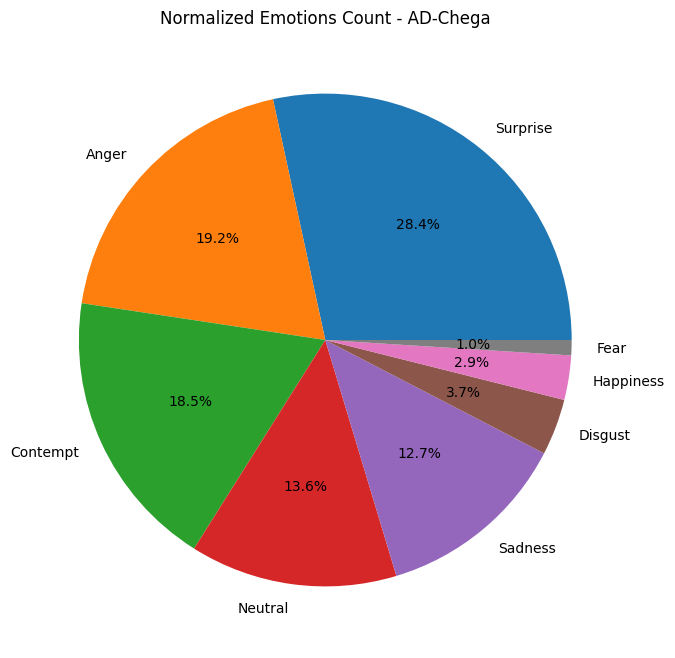

In [28]:
# Plot the normalized emotions count as a pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(emotion_count_normalized.values(), labels=emotion_count_normalized.keys(), autopct='%1.1f%%')
plt.title("Normalized Emotions Count - AD-Chega")
plt.show()





***********FACES COUNT NORMALIZED*************


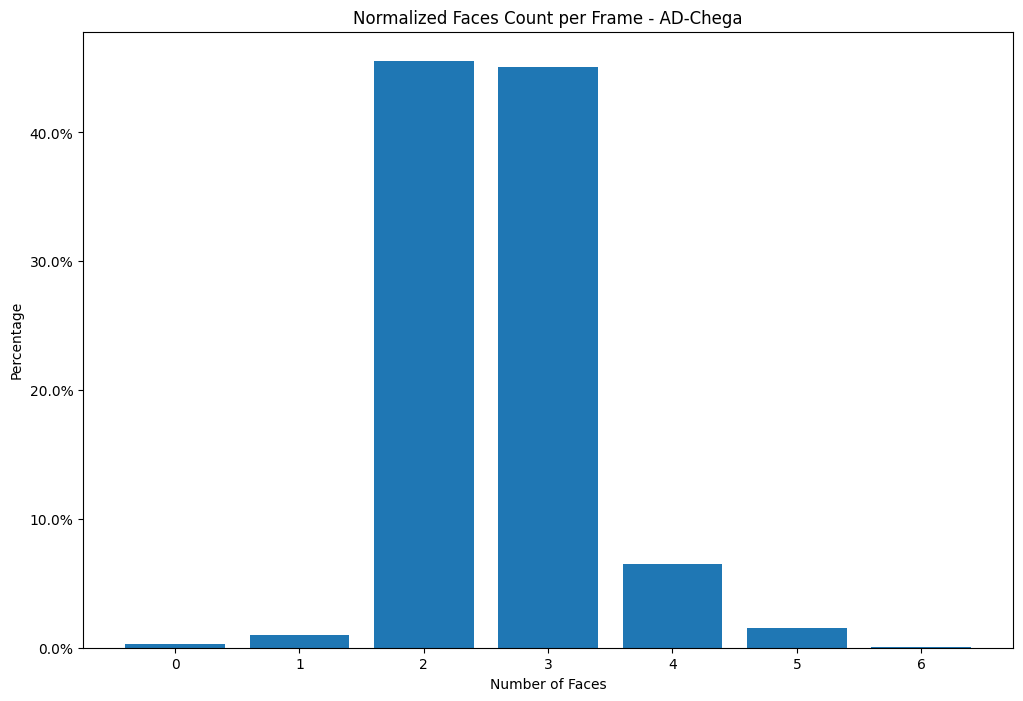

In [29]:
# Check how many faces are in each frame and make a histogram
faces_count = [len(data.iloc[i]['fer']) for i in range(data.shape[0])]
faces_count = Counter(faces_count)
faces_count = {k: v for k, v in sorted(faces_count.items(), key=lambda item: item[0])}

# Normalize the faces count
total = sum(faces_count.values())
faces_count_normalized = {k: v/total for k, v in faces_count.items()}
print("\n\n\n***********FACES COUNT NORMALIZED*************")

# Plot the faces count
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(faces_count_normalized.keys(), faces_count_normalized.values())
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Normalized Faces Count per Frame - AD-Chega")
plt.xlabel("Number of Faces")
plt.ylabel("Percentage")
plt.show()


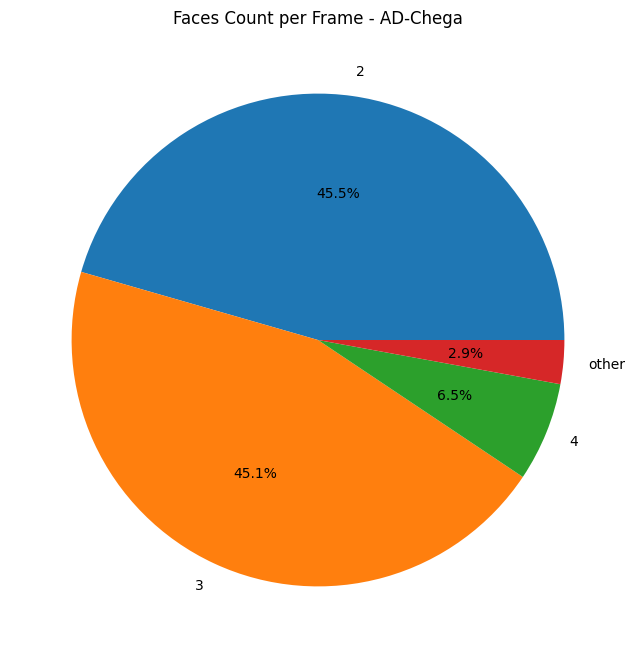

In [30]:
# Plot the faces as a pie chart (include 'other' category for frames with more than 4 faces and less than 2)
faces_count_pie = {k: v for k, v in faces_count.items() if k <= 4 and k >= 2}
faces_count_pie['other'] = sum([v for k, v in faces_count.items() if k > 4 or k < 2])

fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(faces_count_pie.values(), labels=faces_count_pie.keys(), autopct='%1.1f%%')
plt.title("Faces Count per Frame - AD-Chega")
plt.show()




## Comments on last plot
1. Most of time there is one of the politicians on scene, alongside the translator for deaf people.

2. Having shots of the two politicians side-by-side (plus translator) is also very common.

3. In third place comes the scenario where the TV host also appears.

4. Using image embedding vector can also confirm this

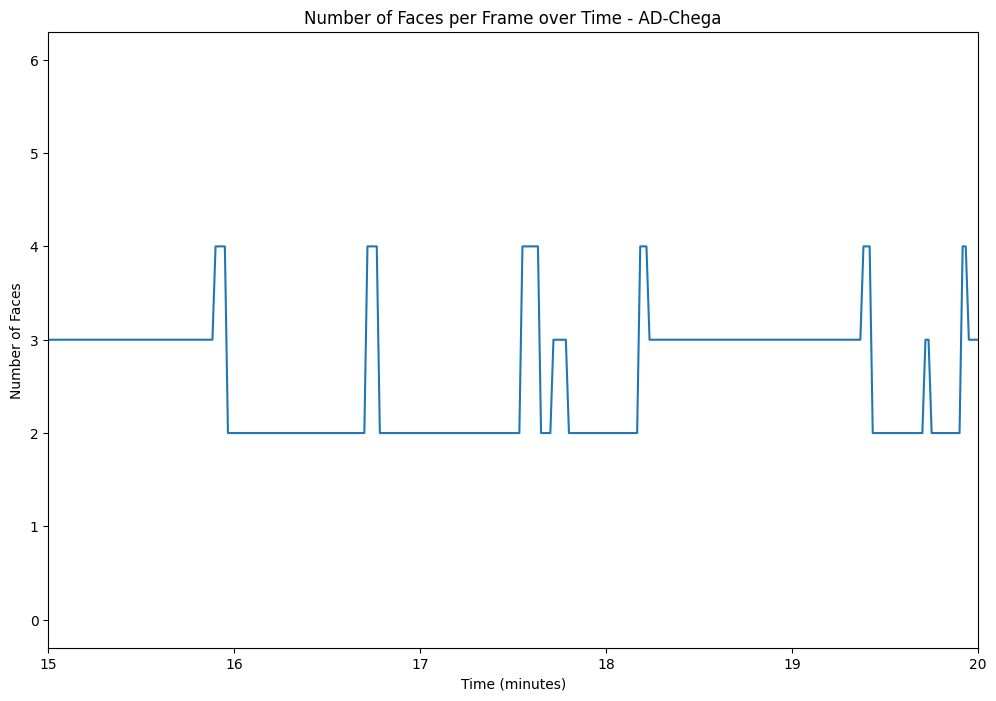

In [31]:
# Number of faces per frame over time (considering frames are already ordered in time and that each frame is 1 second)
# The y-axis represents the number of faces the frame
# The x-axis represents the time in seconds (or frame number)

# Count number of faces in each frame
faces_count = []
for i in range(data.shape[0]):
    faces_count.append(len(data.iloc[i]['fer']))

# Plot the number of faces per frame over time in minutes (each frame is a second)
fig, ax = plt.subplots(figsize=(12, 8))

# Create an array for the x values representing time in minutes
time_in_minutes = np.arange(len(faces_count)) / 60

ax.plot(time_in_minutes, faces_count)
plt.title("Number of Faces per Frame over Time - AD-Chega")
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Faces")
plt.xlim(15, 20) # Limit the x-axis to 5 minutes
plt.show()







***********HEATMAP*************


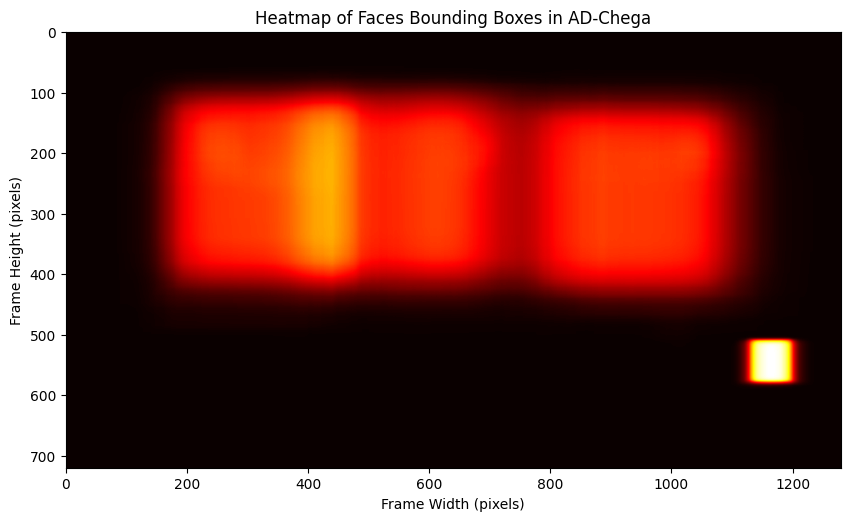

In [32]:
# Plot a heatmap of recognised faces bounding box along the video
# Initialize an empty 2D array for the heatmap

# Load the first frame to get the dimensions
heatmap = np.zeros((720, 1280))

# Loop through the DataFrame and increment the heatmap values at the face positions
print("\n\n\n***********HEATMAP*************")
for i in range(data.shape[0]):
    for fer in data.iloc[i]['fer']:
        face = fer['location']

        x_start = int(fer['location'][0])
        x_end = int(fer['location'][1])
        y_start = int(fer['location'][2])
        y_end = int(fer['location'][3])

        # Increment the heatmap cells corresponding to the bounding box
        heatmap[y_start:y_end, x_start:x_end] += 1


# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap, cmap='hot')  # Overlay the heatmap with transparency
plt.title("Heatmap of Faces Bounding Boxes in AD-Chega")
plt.xlabel("Frame Width (pixels)")
plt.ylabel("Frame Height (pixels)")
plt.show()







***********PAIR OF EMOTIONS*************


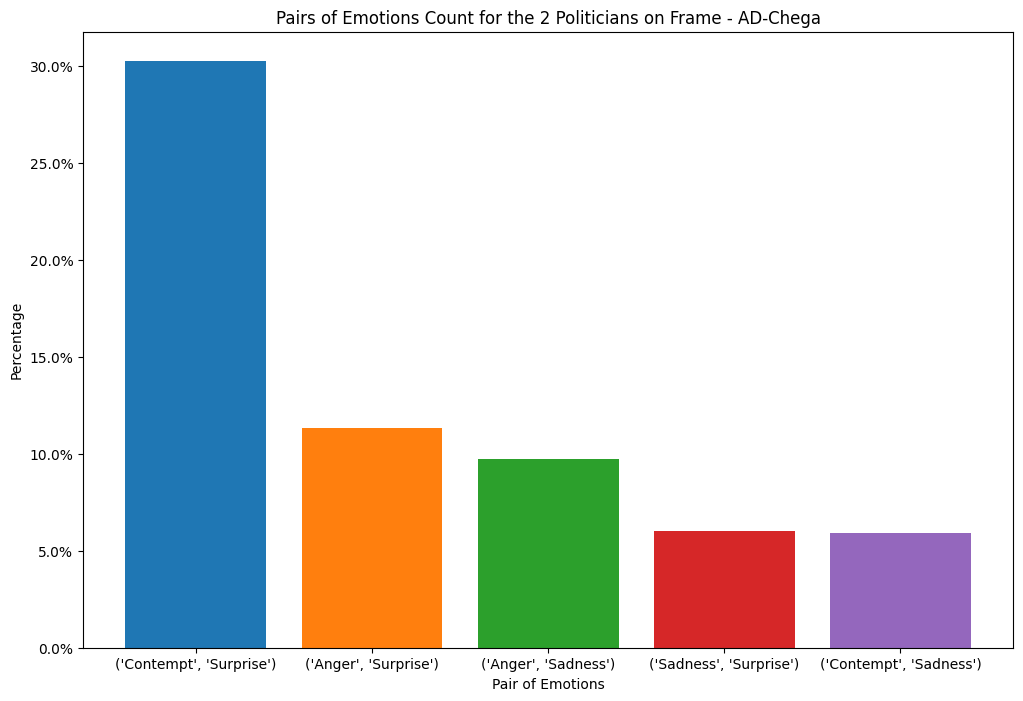

In [35]:
# Count the most common identified pair of emotions in the DataFrame

# Initialize an empty dictionary to store the pairs of emotions
pairs = {}

# Iterate through the DataFrame and extract the pairs of emotions
print("\n\n\n***********PAIR OF EMOTIONS*************")
for i in range(data.shape[0]):

    # Extract faces in the frame
    faces = data.iloc[i]['fer']

    # Count the number of faces
    n_faces = len(faces)

    # Perform according to the number of faces
    if n_faces == 0 or n_faces == 1: # Skip if there are no faces or only one face
        continue

    # Check if sign language lady is present and remove her face if so
    for face in faces:
        if face['location'][0] > 1000 and face['location'][2] > 500:
            faces.remove(face)

    # Count the number of faces
    n_faces = len(faces)
            
    # If there are still two or more faces, extract the pair of emotions (if only one face, skip it)
    if n_faces == 2: 
        # Extract the pair of emotions
        pair = tuple(sorted([face['emotion'] for face in faces]))
        pairs[pair] = pairs.get(pair, 0) + 1
    
    
# Order the pairs by their counts
pairs = {k: v for k, v in sorted(pairs.items(), key=lambda item: item[1], reverse=True)}

# Plot the pairs of emotions normalized
total = sum(pairs.values())
pairs_normalized = {k: v/total for k, v in pairs.items()}

# Plot the pairs of emotions count (only for above 2%)
fig, ax = plt.subplots(figsize=(12, 8))
for pair, count in pairs_normalized.items():
    if count > 0.05:
        ax.bar(str(pair), count)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Pairs of Emotions Count for the 2 Politicians on Frame - AD-Chega")
plt.xlabel("Pair of Emotions")
plt.ylabel("Percentage")
plt.show()


## Comments on the last plot

1. It only uses data about 40% of the video, ie, the video portion where only 2 people (plus sign language lady) are present, most likely the two politicians on frame, since we already know a priori that the TV pivot appears mostly along with the two politicians and not just with a single one.

2. This means the plot refers two the pair of emotions captured by the two politicians in debate. Not surprinsingly, contempt, anger and ironic surprise are some of the most common emotions identified.

3. This graph will probably be re-done more accuratelly when facial embedding vector clustering is used.

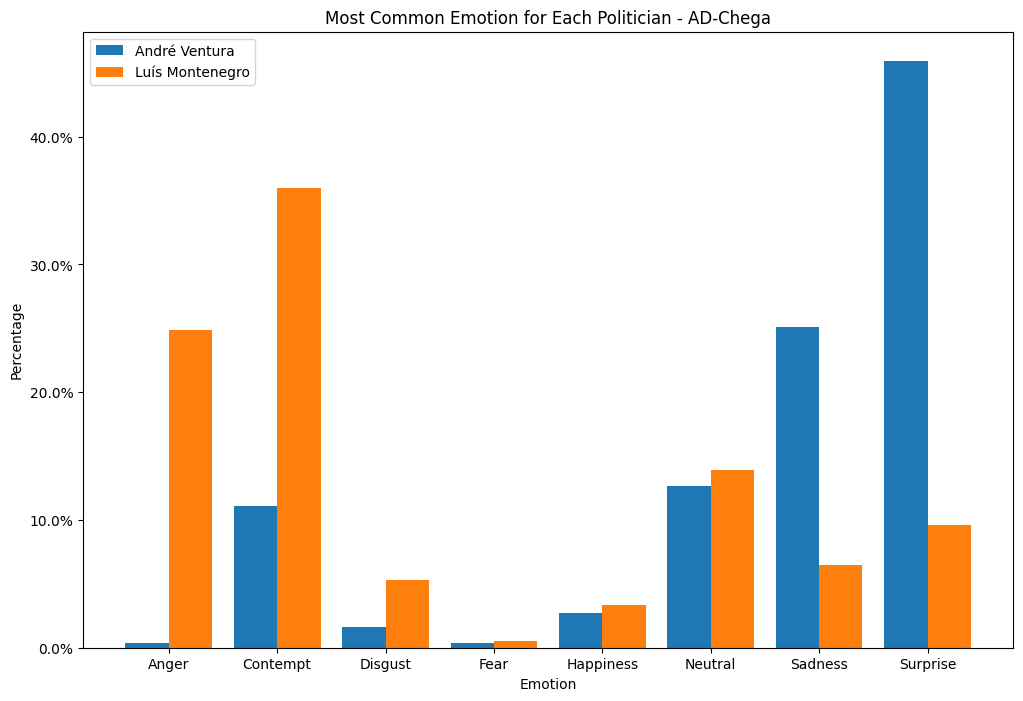

In [57]:
# Identify the most common emotion idefnified in the DataFrame for each person

# Initialize 4 dictionaries to store the most common emotion for each person
emotions_AV = {}
emotions_LM = {}
emotions_sign_language_lady = {}

# Iterate through the DataFrame and extract the most common emotion for each person
for i in range(data.shape[0]):

    # Count number of faces
    n_faces = len(data.iloc[i]['fer'])

    for face in data.iloc[i]['fer']:
        # Perform according to the number of faces
        if face['location'][0] > 1000 and face['location'][2] > 500: # Sign language lady
            emotions_sign_language_lady[face['emotion']] = emotions_sign_language_lady.get(face['emotion'], 0) + 1
        elif face['location'][0] < 300 and face['location'][2] < 300 and n_faces > 2: # Luís Montenegro
            emotions_LM[face['emotion']] = emotions_LM.get(face['emotion'], 0) + 1
        elif face['location'][0] > 700 and face['location'][2] < 300 and n_faces > 2: # André Ventura
            emotions_AV[face['emotion']] = emotions_AV.get(face['emotion'], 0) + 1

# Order the emotions by alphabetical order
emotions_AV = {k: v for k, v in sorted(emotions_AV.items(), key=lambda item: item[0])}
emotions_LM = {k: v for k, v in sorted(emotions_LM.items(), key=lambda item: item[0])}

# Plot the most common emotion for each person in a histogram (for each emotion we have 2 bars, one for each politician)
fig, ax = plt.subplots(figsize=(12, 8))
emotions = list(emotions_AV.keys())
x = np.arange(len(emotions))

# Plot the emotions for André Ventura (normalized)
emotions_AV_normalized = {k: v/sum(emotions_AV.values()) for k, v in emotions_AV.items()}
ax.bar(x, emotions_AV_normalized.values(), width=0.4, label='André Ventura')

# Plot the emotions for Luís Montenegro (normalized)
emotions_LM_normalized = {k: v/sum(emotions_LM.values()) for k, v in emotions_LM.items()}
ax.bar(x + 0.4, emotions_LM_normalized.values(), width=0.4, label='Luís Montenegro')

ax.set_xticks(x + 0.2)
ax.set_xticklabels(emotions)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Most Common Emotion for Each Politician - AD-Chega")
plt.xlabel("Emotion")
plt.ylabel("Percentage")
plt.legend()
plt.show()


## Comments on the last plot

1. Just like the previous plot, this one does not use clustering of facial embedding vector and it becomes hard to indentfy the politician on frame when there's only one on frame. However, based on the known positions of their faces bounding boxes when both are on frame, we can make a reasonable estimation of their emotions, when both on frame.

2. This means the plot refers two the pair of emotions captured by the two politicians in debate. Not surprinsingly, contempt, anger and ironic surprise are some of the most common emotions identified.

3. This graph will probably be re-done more accuratelly when facial embedding vector clustering is used.